<h1>Intro</h1><br>

This project contains some explorations on questions we could raise when working with nyc_air_bnb dataset.
Here I used descriptive analysis and predictive at the end.<br>
Enjoy the reading.<br>
<br>The problem description is here:<br>
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

<b>CONTENT</b>
<li>Data Exploration</li>
<li>Basic Analysis</li>
<li>Advanced Visualization</li>
<li>Predictive Analysis. <i>SPOILER: The accuracy I managed to get is quite usable</i></li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')

<h3>Data Exploration</h3><br>
Let's load take a brief look on the dataset we have:

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

I see here, that there are several columns with incomplete data:<br><br>
<li>name</li>We don't actually need the topics of the listings until we decide to conduct NLP (but we won't). Decsn: Drop it.
<li>host_name</li>In a matter of curiosity, we'll conduct one exploration of this feature. Decsn: Retain, Replace NaN's.
<li>last_review</li>If we had a column with the listing open date, we'd probably find an application for this feature. Decsn: Drop it.
<li>reviews_per_month</li>We'll use this column while conducting predictive analysis. Decsn: Retain, Replace NaN's.
<li>id</li>Index. Decsn: Drop it.

In [5]:
df.drop(['id', 'name', 'last_review'], inplace=True, axis=1)
df['host_name'].replace(np.nan, 'anonymous', inplace=True)
df['reviews_per_month'].replace(np.nan, 0, inplace=True)

In [6]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


For further analysis, I'll cut off the outliers like those where minimum_night set to too high value. Usually, hosts make so to make a pause in their rent activity or to deal with guests directly, avoiding Airbnb's fees,  after a brief conversation in the in-platform chat.

In [7]:
df = df.loc[df['minimum_nights'] < 500]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48885 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48885 non-null int64
host_name                         48885 non-null object
neighbourhood_group               48885 non-null object
neighbourhood                     48885 non-null object
latitude                          48885 non-null float64
longitude                         48885 non-null float64
room_type                         48885 non-null object
price                             48885 non-null int64
minimum_nights                    48885 non-null int64
number_of_reviews                 48885 non-null int64
reviews_per_month                 48885 non-null float64
calculated_host_listings_count    48885 non-null int64
availability_365                  48885 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 5.2+ MB


Now the dataset looks complete and that means it's time to build first plots

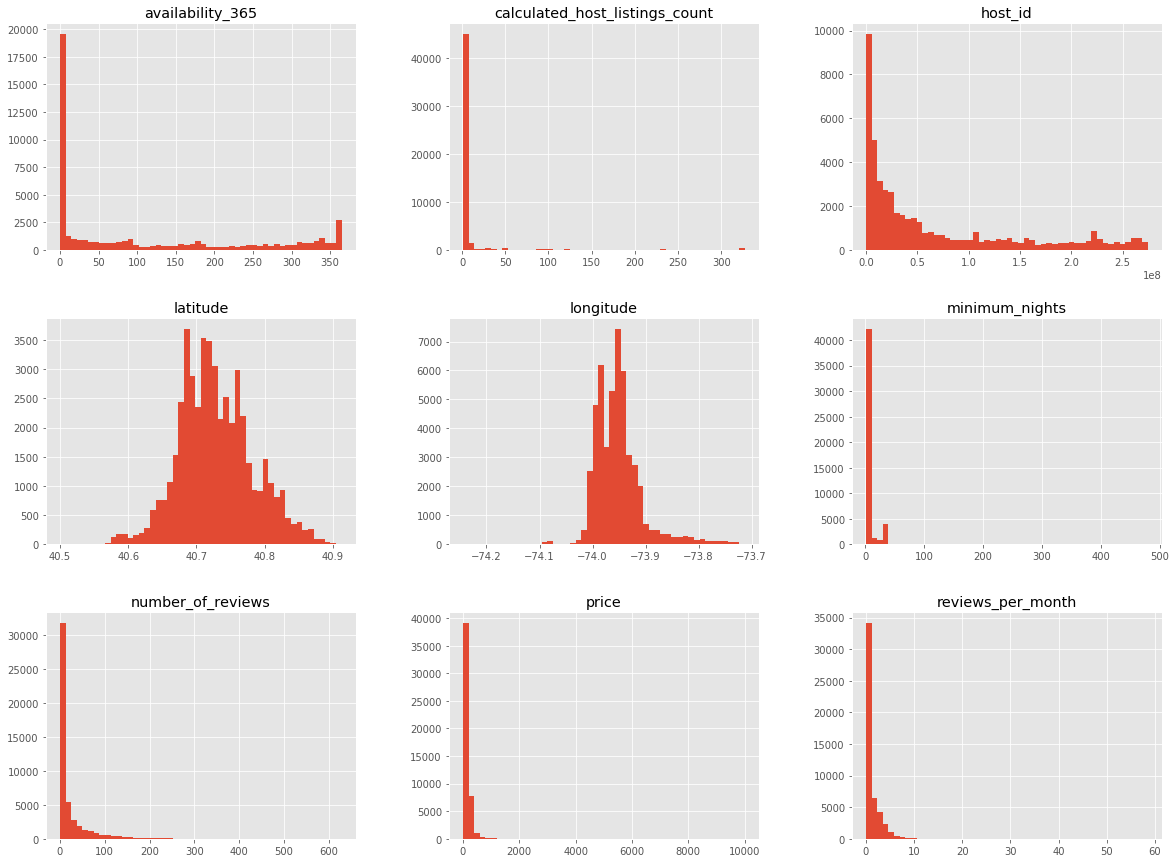

In [9]:
df_count = df._get_numeric_data()
df_count.hist(bins = 50, figsize=(20,15))
plt.show()

Well, the data on the plots seems to be logically distributed. To notice something interesting, we're going to take a look on some features more in detail. 

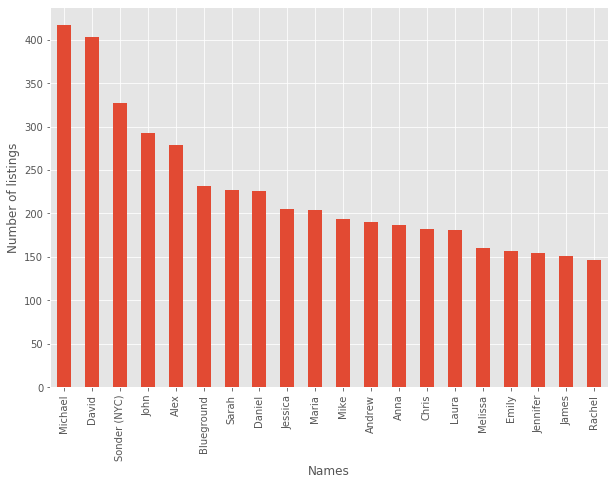

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

df.host_name.value_counts().to_frame().reset_index().iloc[:20,:].plot(kind='bar', x='index', legend=False, ax=ax)
plt.xlabel('Names')
plt.ylabel('Number of listings')

plt.show()

Wow, looks like Michael is the top name among host. Interestingly, my name is Mikhail (Michael) and I was the host for a couple of years too! Now, if you know any Michael in your friends, ask him about a good price on AirBnb :)

In [11]:
#Further brief data observation
df.neighbourhood_group.value_counts()

Manhattan        21656
Brooklyn         20100
Queens            5665
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Let's go over the next feature I want to explore - calculated_host_listings_count. What I want to know here is do people make business with AirBnb professionally or it's rather a privat activity.

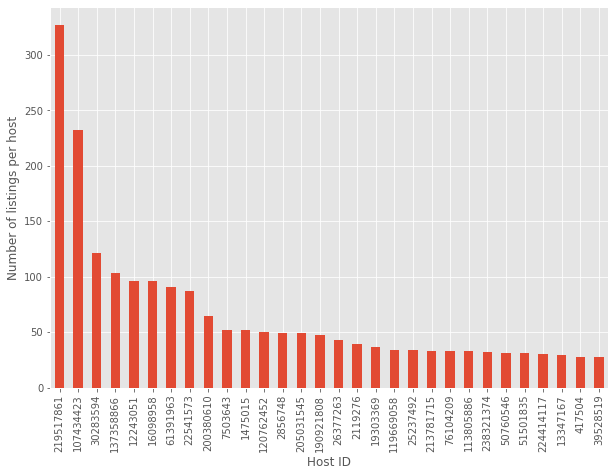

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
# Group and calculate all listings per each host
df_top_host = df.groupby('host_id').agg('count').sort_values(by=['calculated_host_listings_count'], ascending=False).reset_index()
# Plot only the top 30 of them
df_top_host.iloc[:30,[df_top_host.columns.get_loc('host_id'),df_top_host.columns.get_loc('calculated_host_listings_count')]].plot(kind='bar', x='host_id', y='calculated_host_listings_count', ax=ax, legend=False)
plt.xlabel('Host ID')
plt.ylabel('Number of listings per host')

plt.show()

Amazing, top 30 hosts live very luxury lives I guess. To my conclusion, they are whether management companies or people with an impressive amount of property in own. All in all, do they pay taxes from that?

In [13]:
df.room_type.value_counts()

Entire home/apt    25403
Private room       22323
Shared room         1159
Name: room_type, dtype: int64

Now, it's time for more advanced visualization with GeoJSON maps

In [14]:
# Import GeoPandas library to operate Geo data.
import geopandas as gpd

In [15]:
# Let's first read two main maps we're going to work with. 
# The map with boroughs boundaties and the map with neighbourhoods boundaties

f = r'Borough Boundaries.geojson'
bd = gpd.read_file(f) # This is for boroughs

f = r'Neighborhood Tabulation Areas.geojson'
nhd = gpd.read_file(f) # This is for neighbourhoods

In [16]:
# Explore it:

bd.head(3)

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2,Bronx,1186612476.97,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5,Staten Island,1623920681.95,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...
2,4,Queens,3044778579.91,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...


In [17]:
nhd.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...
1,QN51,52488276.867,081,Murray Hill,33266.9049948,Queens,4,(POLYGON ((-73.80379022888246 40.7756101117924...
2,QN27,19726845.4194,081,East Elmhurst,19816.7122926,Queens,4,(POLYGON ((-73.86109724401859 40.7636644770877...


Or better this way:

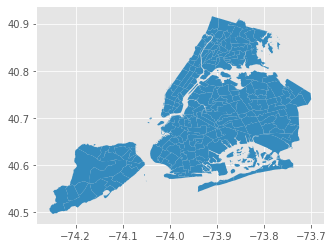

In [18]:
# !conda install --channel conda-forge descartes
nhd.plot()
plt.show()

Awesome! This works like tipycal dataframe, but Geo!

We need to do some data manipulation for the further analysis, so let's perform it.

In [19]:
# Rename columns in the geoframes to correspond with the initial dataframe.

nhd.rename(columns={'ntaname' : 'neighbourhood'}, inplace=True)
bd.rename(columns = {'boro_name' : 'neighbourhood_group'}, inplace=True)

Cool, now let's merge'em on the corresponding columns and drop unnecessary features.

In [20]:
# This is for the boroughs
df_bd = df.merge(bd, on='neighbourhood_group')
df_bd.drop('boro_code', axis=1, inplace=True)

# This is for the neighbourhoods
df_nhd = df.merge(nhd, on = 'neighbourhood')
df_nhd.drop(['boro_name', 'boro_code', 'county_fips', 'ntacode'], axis=1, inplace=True)

In [21]:
# Take a look what we've got for the neighbourhoods:
df_bd.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,shape_area,shape_leng,geometry
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,1937596652.24,739911.53321,(POLYGON ((-73.86706149472118 40.5820879767934...
1,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1937596652.24,739911.53321,(POLYGON ((-73.86706149472118 40.5820879767934...
2,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,1937596652.24,739911.53321,(POLYGON ((-73.86706149472118 40.5820879767934...


In [22]:
# Take a look what we've got for the boroughs:
df_nhd.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,shape_area,shape_leng,geometry
0,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,20528197.1221,23971.4659049,(POLYGON ((-73.95337017508862 40.6806405084443...
1,63613,Patricia,Brooklyn,Clinton Hill,40.69000,-73.96788,Private room,55,7,27,0.23,2,292,20528197.1221,23971.4659049,(POLYGON ((-73.95337017508862 40.6806405084443...
2,68599,George,Brooklyn,Clinton Hill,40.68346,-73.96374,Private room,105,2,105,0.92,1,304,20528197.1221,23971.4659049,(POLYGON ((-73.95337017508862 40.6806405084443...


Now my aim is to visualize the density of the listings across the NY's boroughs

In [23]:
# We need to group by boroughs and count the amount of listings for the each group:
bc = df.groupby('neighbourhood_group', as_index=False).agg('count')

# Extract only those columns we're looking for:
bc = bc.iloc[:,:2]

# Merge boroughs geodata with the count calculated dataset on the 'neighbourhood_group' column:
geo_bc = bd.merge(bc, on="neighbourhood_group")

[]

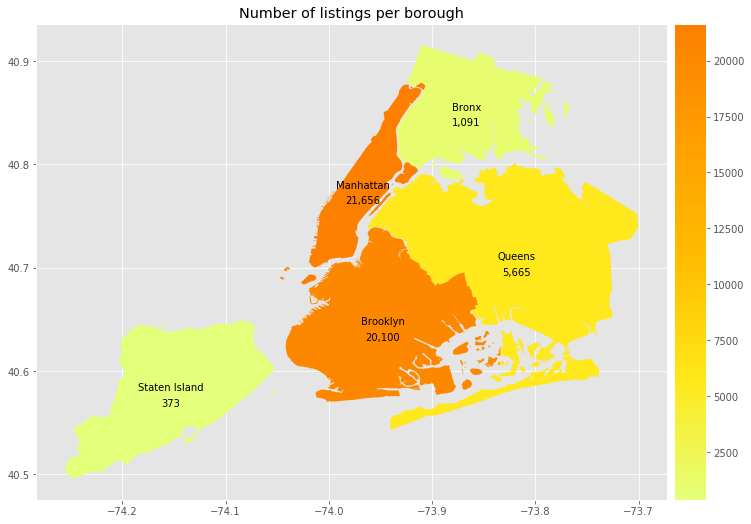

In [24]:
# This is for the visual aesthetics only:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(12,10))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Finally, plot it:
geo_bc.plot(column='host_id', cmap='Wistia', legend=True, ax=ax, cax=cax)

def getXY(pt, x_adj=0, y_adj=0):
    return (pt.x+x_adj, pt.y+y_adj)

# Add annotations:
for index, value in enumerate(geo_bc['host_id']):
    label = format(int(value), ',')
    ax.annotate(label, xy=getXY(geo_bc.geometry.iloc[index].centroid,0,-0.015), ha='center', color='black')
    ax.annotate(geo_bc.iloc[index,geo_bc.columns.get_loc('neighbourhood_group')], xy=getXY(geo_bc.geometry.iloc[index].centroid), ha='center', color='black')

ax.set_title(label='Number of listings per borough', fontdict=None, loc='center')

plt.plot()

Great! I would not say that this is what I didn't expect to see, but this is a great demonstration of the power of visualization.

While we're working with this map, I want to see the mean one-neight cost for the each borough.

In [25]:
# bp here stands for borough price (mean)
bp = df.groupby(['neighbourhood_group'], as_index=False).agg('mean')

# Exctract what we need:
bp = bp.iloc[:,[0,4]]

# Merge boroughs geodata with the mean calculated dataset on the 'neighbourhood_group' column:
geo_bp = bd.merge(bp, on='neighbourhood_group')

[]

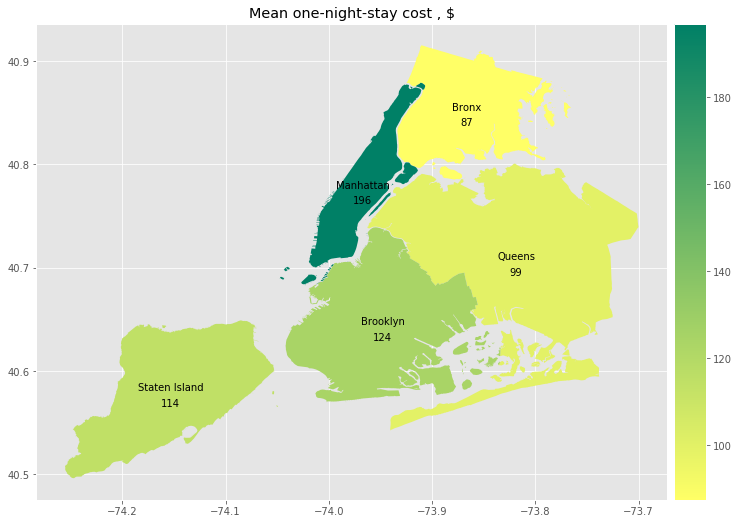

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Finally, plot it:
geo_bp.plot(column='price', cmap='summer_r', legend=True, ax=ax, cax=cax)

def getXY(pt, x_adj=0, y_adj=0):
    return (pt.x+x_adj, pt.y+y_adj)

# Add annotations:
for index, value in enumerate(geo_bp['price']):
    label = format(int(value), ',')
    ax.annotate(label, xy=getXY(geo_bc.geometry.iloc[index].centroid,0,-0.015), ha='center', color='black')
    ax.annotate(geo_bc.iloc[index,geo_bc.columns.get_loc('neighbourhood_group')], xy=getXY(geo_bc.geometry.iloc[index].centroid), ha='center', color='black')

ax.set_title(label='Mean one-night-stay cost , $', fontdict=None, loc='center')

plt.plot()


To summarize the plot above, if you're used to living high off the hog and want to feel the hustle and bustle of the big city, then you'd better afford to settle in Manhattan. Otherwise, you'd better stay in Queens or Staten Island (the Bronx is considered a dangerous place for newcomers) and get to the downtown by car or by bus.

However, in order to find out how safe the expensive NY boroughs are, we're going to explore the NYPD Database with all criminal reports . Also, I expect to see less criminal activity in the districts with a higher mean one-night-stay costs.   

Previously, I filtered the NYPD database and left only complaints related to the most severe offenses:<br><br>
<li>ASSAULT 3 & RELATED OFFENSES</li>
<li>GRAND LARCENY</li>
<li>FELONY ASSAULT</li>
<li>DANGEROUS DRUGS</li>
<li>SEX CRIMES</li>
<li>RAPE</li>
which happened in 2018 the whole DB in more than 6.5m rows.

In [27]:
# Loading the crimes dataset
crimes2018 = pd.read_csv('nyc_crimes_2018', parse_dates=['CMPLNT_TO_DT'],index_col = None)
crimes2018.drop('Unnamed: 0', inplace=True, axis=1)

In [28]:
crimes2018.head()

,CMPLNT_TO_DT,OFNS_DESC,Latitude,Longitude
0,2018-12-31,ASSAULT 3 & RELATED OFFENSES,40.815765,-73.885857
1,2018-12-31,GRAND LARCENY,40.748767,-73.985320
2,2018-12-31,FELONY ASSAULT,40.684616,-73.918933
3,2018-12-31,ASSAULT 3 & RELATED OFFENSES,40.805469,-73.963840
4,2018-12-31,ASSAULT 3 & RELATED OFFENSES,40.688489,-73.983782


In [29]:
crimes2018.OFNS_DESC.value_counts()

ASSAULT 3 & RELATED OFFENSES    45238
GRAND LARCENY                   37946
FELONY ASSAULT                  17214
DANGEROUS DRUGS                 12689
SEX CRIMES                       5410
RAPE                             1197
Name: OFNS_DESC, dtype: int64

Here we're converting the pandas dataset into a geopandas dataset:

In [30]:
geo_crimes2018 = gpd.GeoDataFrame(crimes2018, geometry=gpd.points_from_xy(crimes2018.Longitude, crimes2018.Latitude))
geo_crimes2018 = geo_crimes2018.loc[:,['geometry']]
geo_crimes2018.dropna(axis=0, inplace=True)
geo_crimes2018.reset_index()
geo_crimes2018.head()

,geometry
0,POINT (-73.88585733899998 40.81576532700007)
1,POINT (-73.98531965899997 40.74876701400007)
2,POINT (-73.91893265699997 40.68461629400008)
3,POINT (-73.96384004499998 40.80546854800008)
4,POINT (-73.98378242199995 40.68848913100004)


Now I'm using a function for plotting the heatmap. This function I got on:<br>
https://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


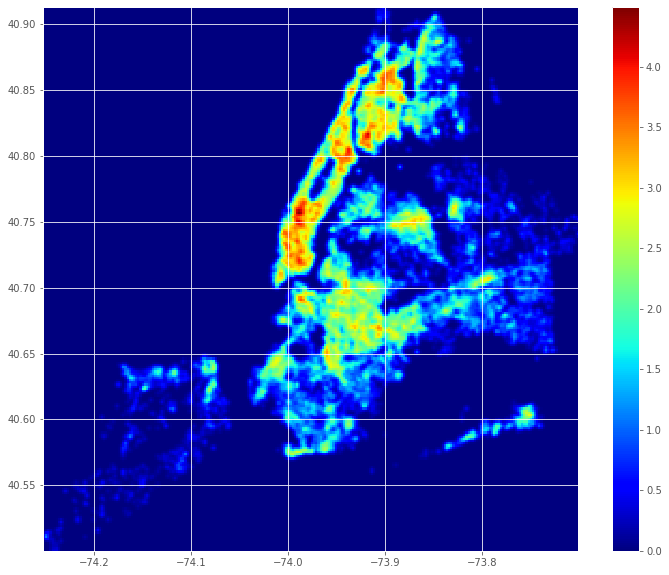

In [31]:
from scipy import ndimage
import matplotlib.pylab as pylab

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))

    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent, aspect='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
    
from mpl_toolkits.axes_grid1 import make_axes_locatable
pylab.rcParams['figure.figsize'] = 12, 10

# nhd.plot(ax=ax)
heatmap(geo_crimes2018, bins=250, smoothing=0.9)


Interestingly, but the most expensive borough Manhattan seems to be more dangerous than Bronx! <br><br>
I'll dig deeper then, to find the reasons why people are ready to pay so much to stay in Manhattan, but first, let's visualize neighborhoods rather than boroughs and see what else we can see.<br>

From the experimentation I know, that some neighborhood names in the initial dataset and from the geo dataset are different. So, we need slightly another approach to this task.

In [32]:
# Transform df to geopandas format:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Inner join geopandas df to nhd (neighbourhood GeoJSON dataset):
geo_df_j = gpd.sjoin(nhd, geo_df, how='inner', op='intersects')

geo_df_j.head(3)

D:\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  '(%s != %s)' % (left_df.crs, right_df.crs))


,ntacode,shape_area,county_fips,neighbourhood_left,shape_leng,boro_name,boro_code,geometry,index_right,host_id,...,neighbourhood_right,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...,36358,35927005,...,Borough Park,40.63522,-74.00596,Shared room,35,1,0,0.00,10,352
0,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...,40039,216772639,...,Borough Park,40.63529,-74.00618,Private room,48,1,2,0.91,7,169
0,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...,36156,216772639,...,Borough Park,40.63378,-74.00599,Private room,60,1,7,0.76,7,179


In [33]:
# Group by neighbourhood_left (from nbh) and calculate the mean price for each neighbourhood:
nb_join_price = geo_df_j.groupby('neighbourhood_left', as_index=False).agg('mean')

# Extract what we need:
nb_join_price = nb_join_price.iloc[:,[nb_join_price.columns.get_loc('neighbourhood_left'),nb_join_price.columns.get_loc('price')]]

nb_join_price.head(2)

,neighbourhood_left,price
0,Allerton-Pelham Gardens,86.08
1,Annadale-Huguenot-Prince's Bay-Eltingville,107.00


In [34]:
# Merge  with the joined geo df
geo_nb_join_price = geo_df_j.merge(nb_join_price, on='neighbourhood_left')

[]

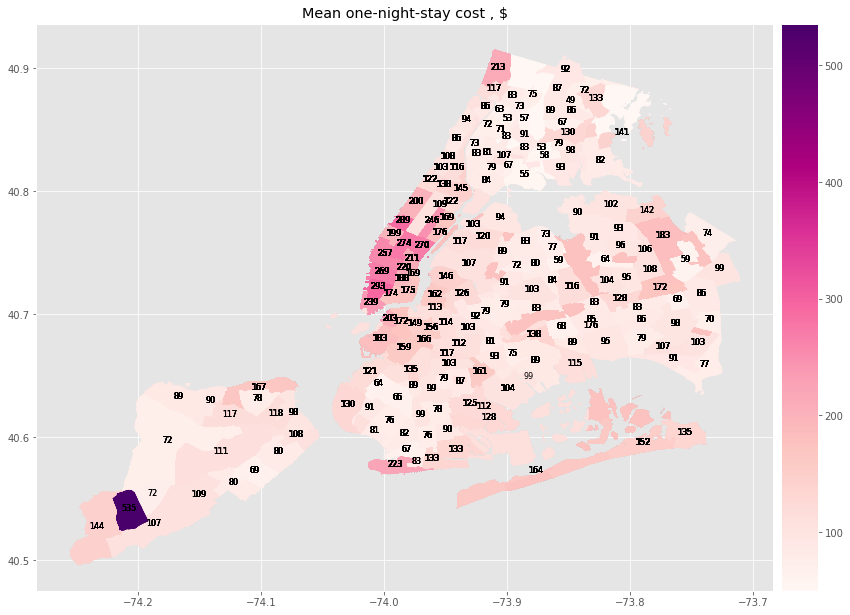

In [35]:
fig, ax = plt.subplots(figsize=(14,12))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Finally, plot it:
geo_nb_join_price.plot(column='price_y', figsize=(10,10), cmap='RdPu', legend=True, ax=ax, cax=cax)

def getXY(pt, x_adj=0, y_adj=0):
    return (pt.x+x_adj, pt.y+y_adj)

# Add annotations:
for index, value in enumerate(geo_nb_join_price['price_y']):
    label = format(int(value), ',')
    ax.annotate(label, xy=getXY(geo_nb_join_price.geometry.iloc[index].centroid,0,0), ha='center', color='black', fontsize=8)

ax.set_title(label='Mean one-night-stay cost , $', fontdict=None, loc='center')

plt.plot()

Factually, the is the most expensive neighborhood is Rossville-Woodrow. However, this is due to few observations in this area (only 4) and two lots with an extremely high price.

In [36]:
nb_join_price[nb_join_price['price'] > 500]

,neighbourhood_left,price
142,Rossville-Woodrow,535.75


In [37]:
geo_nb_join_price[geo_nb_join_price['neighbourhood_left'] == 'Rossville-Woodrow'].loc[:,['neighbourhood_left','price_x']]

,neighbourhood_left,price_x
28052,Rossville-Woodrow,118
28053,Rossville-Woodrow,1250
28054,Rossville-Woodrow,700
28055,Rossville-Woodrow,75


I want to add some extra layers and check one idea:

In [55]:
# Load a Theatres layer
f=r'theaters.geojson'
theatres = gpd.read_file(f)

# Load a Museums layer
f=r'New York City Museums.geojson'
museums = gpd.read_file(f)

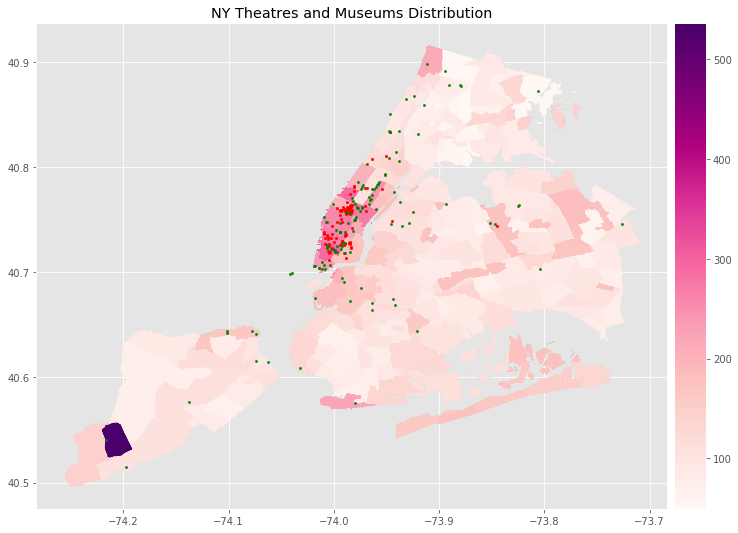

In [39]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(12,10))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot a base layer
base = geo_nb_join_price.plot(column='price_y', ax=ax, figsize=(10,10), cmap='RdPu', legend=True, cax=cax)

# Plot a Theatres layer
theatres.plot(ax=ax, marker='o', color='red', markersize=6)

# Plot a Museums layer
museums.plot(ax=ax, marker='o', color='green', markersize=5)

# Set title
ax.set_title(label='NY Theatres and Museums Distribution', fontdict=None, loc='center')

plt.show()

Now It became clear for me why people, who book housing through AirBnb prefer to pay so much to stay in Manhattan - all cultural life is located there. However, I see here a very useful tip for travelers - to book in Bronx, which is twice cheaper and the equally safe as neighboring Manhattan. 

To finalize with visualization, lets plot mean availability and see which neighborhoods are the most bookable.

In [40]:
# Group by neighbourhood_left (from the joined geo dataframe) and calculate the mean availability for each neighbourhood:
nb_avb = geo_df_j.groupby('neighbourhood_left', as_index=False).agg('mean')

# Pick up the columns we need:
nb_avb = nb_avb.loc[:,['neighbourhood_left', 'availability_365']]

# Merge  with the joined geo df
geo_nb_avb = geo_df_j.merge(nb_avb, on='neighbourhood_left')

geo_nb_avb.head(3)

,ntacode,shape_area,county_fips,neighbourhood_left,shape_leng,boro_name,boro_code,geometry,index_right,host_id,...,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365_x,availability_365_y
0,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...,36358,35927005,...,40.63522,-74.00596,Shared room,35,1,0,0.00,10,352,151.43662
1,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...,40039,216772639,...,40.63529,-74.00618,Private room,48,1,2,0.91,7,169,151.43662
2,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...,36156,216772639,...,40.63378,-74.00599,Private room,60,1,7,0.76,7,179,151.43662


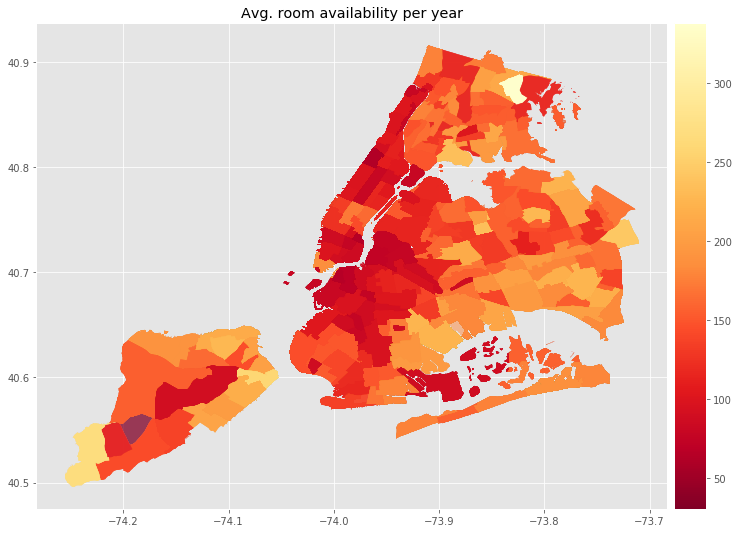

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(12,10))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Base plot
base = geo_nb_avb.plot(column='availability_365_y', ax=ax, figsize=(10,10), cmap='YlOrRd_r', legend=True, alpha=0.5, cax=cax)

# Set title
ax.set_title(label='Avg. room availability per year', fontdict=None, loc='center')

plt.show()

What I want to conclude here is that the closer listings are located to Manhattan, the busier host are.

<h3>Predictive Analysis</h3>

Now I want to use machine learning tecniques to build a model which could predict the price for the lot. However, since we don't have a lot of descriptive features related to any particulat listing, all models I built were poorly usable. The key here was to bin the price into categories LOW, MEDIUM and HIGH and try to classify each position according this groups.

Checking the correlation among numeric features

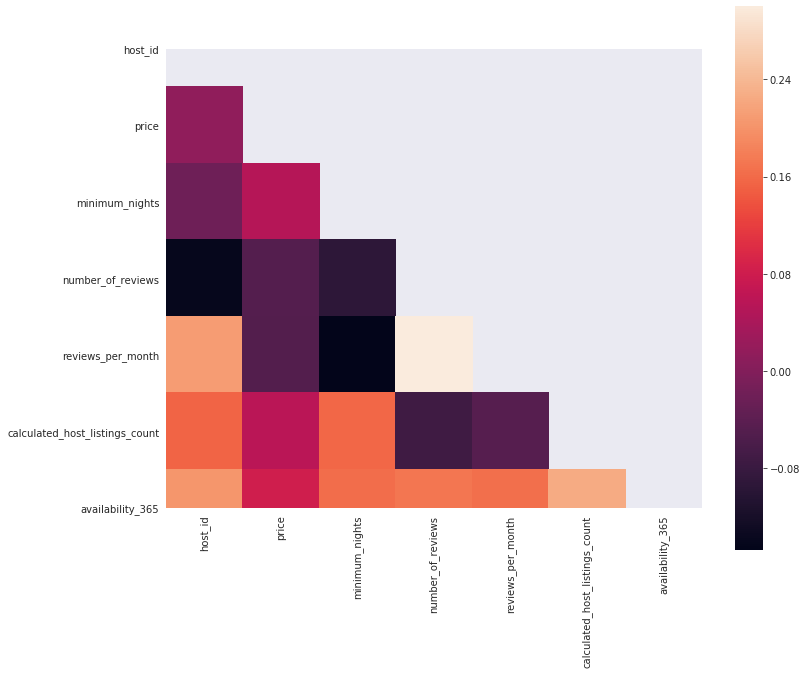

In [42]:
import seaborn as sns

corr = df_count.loc[:,~df_count.columns.isin(['latitude','longitude'])].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

Collinearity is not detected.

In [43]:
# Let's dummify categirical variables 'neighbourhood':
dummy_var = pd.get_dummies(df['neighbourhood'])

# And join them back to the df:
df_num_n = pd.concat([df_count, dummy_var], axis=1)

# Then dummify categirical variables 'room_type':
room_dummies = pd.get_dummies(df['room_type'])

# And join them back to the df:
df_num_n = pd.concat([df_num_n, room_dummies], axis=1)

# Drop host_id
df_num_n.drop('host_id', inplace=True, axis=1)

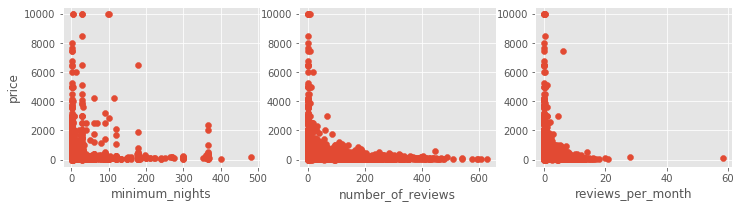

In [44]:
# Further data exploration
fig, ax = plt.subplots(1, 3)

plt.subplot(331)
plt.scatter(x=df_num_n.loc[:,'minimum_nights'], y=df_num_n.loc[:,['price']])
plt.xlabel('minimum_nights')
plt.ylabel('price')

plt.subplot(332)
plt.scatter(x=df_num_n.loc[:,['number_of_reviews']], y=df_num_n.loc[:,['price']])
plt.xlabel('number_of_reviews')

plt.subplot(333)
plt.scatter(x=df_num_n.loc[:,['reviews_per_month']], y=df_num_n.loc[:,['price']])
plt.xlabel('reviews_per_month')

plt.show()

In [45]:
df_num_n.head(2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Allerton,Arden Heights,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df_num_n[['price']].describe()

,price
count,48885.000000
mean,152.725089
std,240.174442
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Here we see the boundaries for the price binning:

In [47]:
bins = [0, 69, 175, 10000]
group_names = ['Low', 'Medium', 'High']
df_num_n['price_binned'] = pd.cut(df_num_n['price'], bins, labels = group_names, include_lowest = True)

In [48]:
# Create a copy for backup
df_prbn = df_num_n.copy()

# Drop 'price' column
df_prbn.pop('price')

# Set y = 'price_binned' column values and exclude it from the df
y = df_prbn.pop('price_binned')

df_prbn.head(1)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Allerton,Arden Heights,Arrochar,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,1,9,0.21,6,365,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<h3>Model Developlemt</h3>

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_prbn, y, test_size=0.2, random_state=1)

In [50]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators = 100,
                            n_jobs = -1,
                            max_features = "auto",
                            random_state = 888,
                            min_samples_leaf=1)
rfc.fit(x_train,y_train)
yhat = rfc.predict(x_test)
print(metrics.accuracy_score(y_test, yhat))

0.6971463639153115


<h3>Model Tuning</h3>

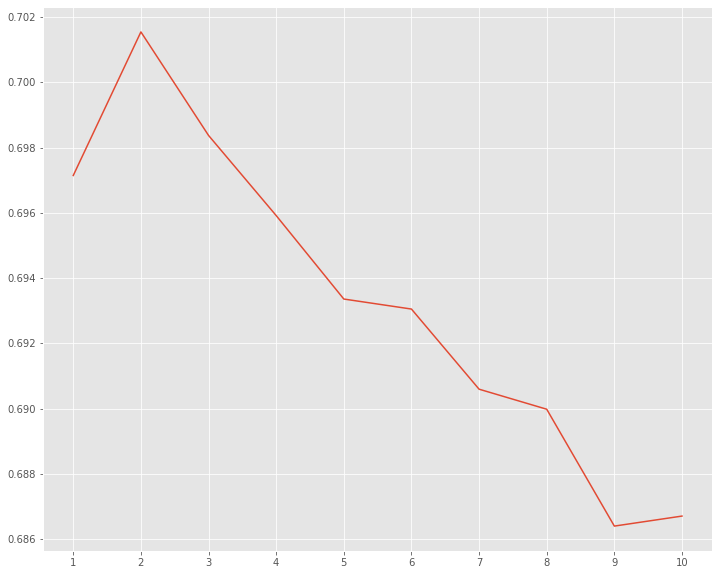

In [51]:
# Let's fund the best number of min_samples_leaf:
results = []
for sam in range(1,11):
    rfc = RandomForestClassifier(n_estimators = 100,
                            n_jobs = -1,
                            max_features = "auto",
                            random_state = 888,
                            min_samples_leaf=sam)
    rfc.fit(x_train,y_train)
    yhat = rfc.predict(x_test)
    results.append(metrics.accuracy_score(y_test, yhat))
plt.plot(results)
plt.xticks(np.arange(len(results)), np.arange(1,11))
plt.show()

Well, min_samples_leaf = 2 is the optimum for this parameter. The next parameter is 'n_estimators':

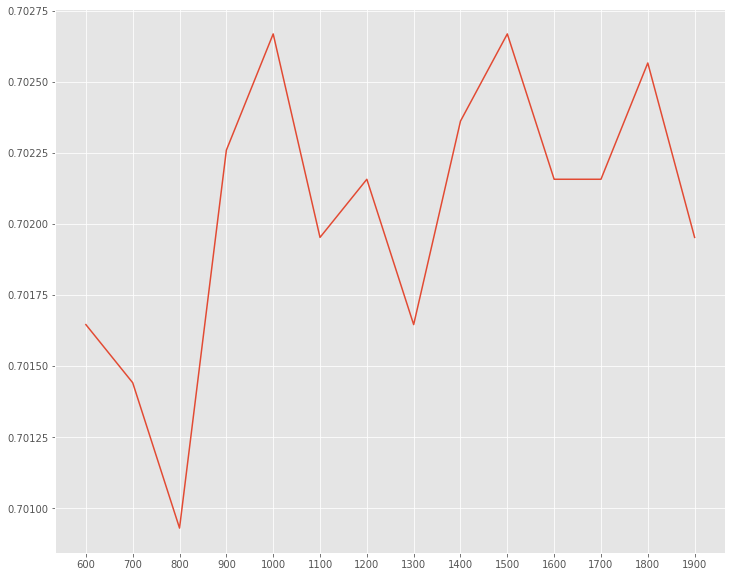

In [52]:
results = []
for tr in range(600,2000,100):
    rfc = RandomForestClassifier(n_estimators = tr,
                            n_jobs = -1,
                            max_features = "auto",
                            random_state = 888,
                            min_samples_leaf=2)
    rfc.fit(x_train,y_train)
    yhat = rfc.predict(x_test)
    results.append(metrics.accuracy_score(y_test, yhat))
plt.plot(results)
plt.xticks(np.arange(len(results)), np.arange(600,2000,100))
plt.show()

Ok, the optimum for 'n_estimators' is 1000. Now, we're checking the last parameter 'max_features':

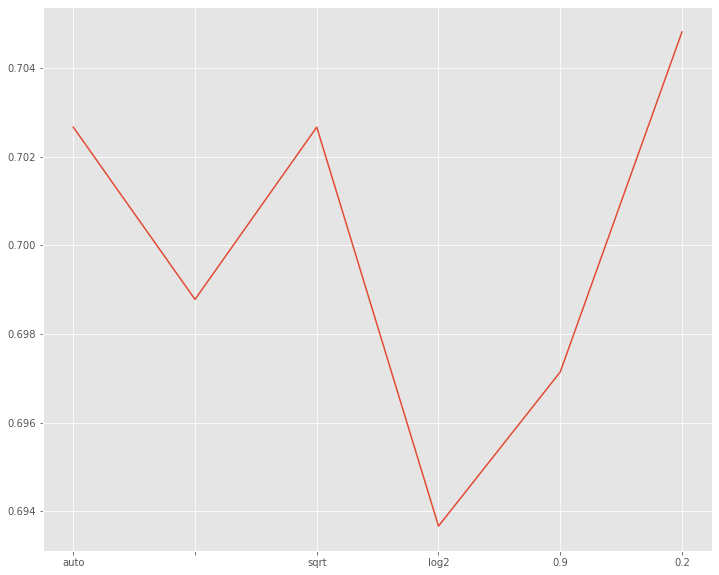

In [53]:
results = []
mf_opt=["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_f in mf_opt:
    rfc = RandomForestClassifier(n_estimators = 1000,
                            n_jobs = -1,
                            max_features = max_f,
                            random_state = 888,
                            min_samples_leaf=2)
    rfc.fit(x_train,y_train)
    yhat = rfc.predict(x_test)
    results.append(metrics.accuracy_score(y_test, yhat))
plt.plot(results)
plt.xticks(np.arange(len(results)), ["auto", None, "sqrt", "log2", 0.9, 0.2])
plt.show()

The optimum for 'max_features' is 0.2. Changing of other parameters didn't bring any improvement.

The final model training:

In [54]:
rfc = RandomForestClassifier(n_estimators = 1000,
                            n_jobs = -1,
                            max_features = 0.2,
                            random_state = 888,
                            min_samples_leaf=2)
rfc.fit(x_train,y_train)
yhat = rfc.predict(x_test)
print('The accuracy of the model I managed to build is %s percent' % round(100*metrics.accuracy_score(y_test, yhat),2))

The accuracy of the model I managed to build is 70.48 percent


Not bad, but not excellent. Quite a usable model.

<h3>Thanks for going through the notebook!</h3>